<a href="https://colab.research.google.com/github/atheistsoldier/TDoC-Stonksmaster/blob/task4/task4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
from numpy import arange,set_printoptions
from matplotlib import pyplot as plt
from pandas import read_csv,set_option
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold, train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error,r2_score
colNames=['CRIM','ZN','INDUS', 'CHAS', 'NOX' ,'RM' ,'AGE' ,'DIS', 'RAD' ,'TAX' ,'PTRATIO' ,'B' ,'LSTAT', 'MEDV']
df=read_csv("housing4.csv",names=colNames,delim_whitespace=True)
df=df.dropna()
dataset=df.values
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


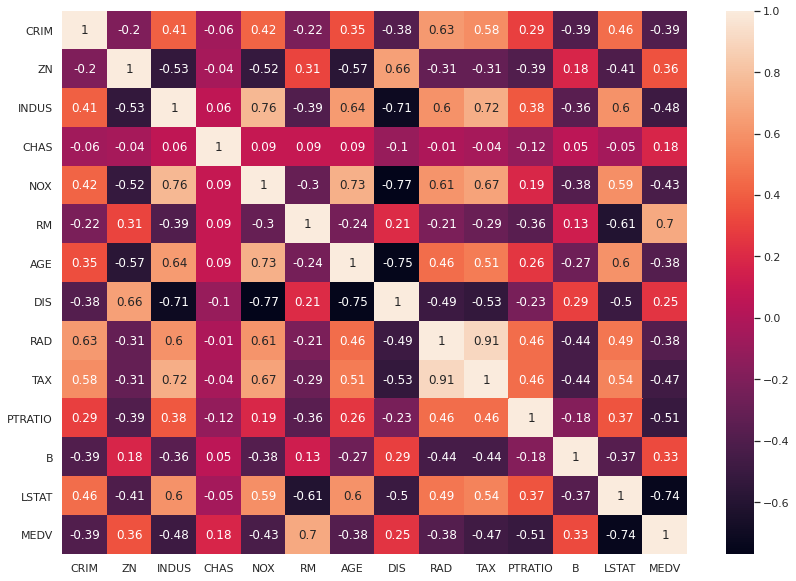

In [23]:
correlationMatrix=df.corr().round(2)
sns.set(rc={'figure.figsize':(14,10)})
sns.heatmap(data=correlationMatrix,annot=True)

In [24]:
Y=dataset[:,-1]
X=dataset[:,0:13]


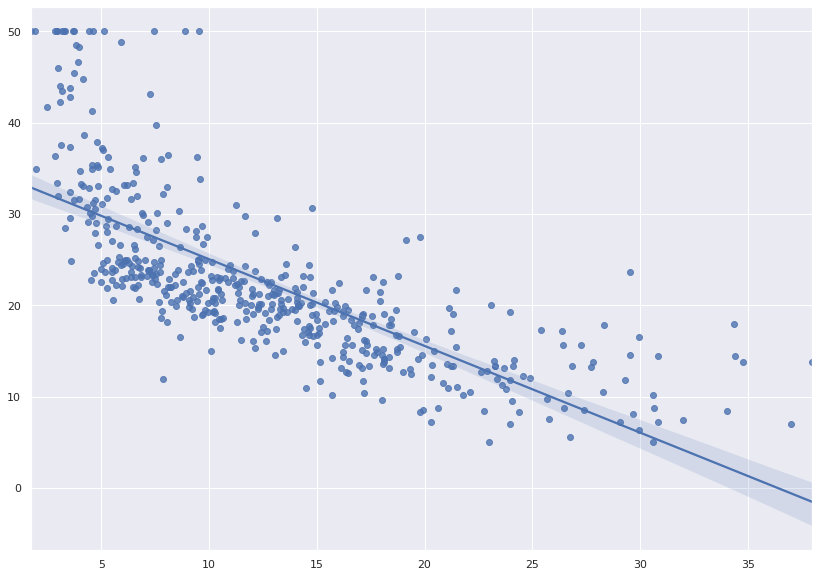

In [25]:
sns.regplot(x=dataset[:,-2],y=Y,data=df)

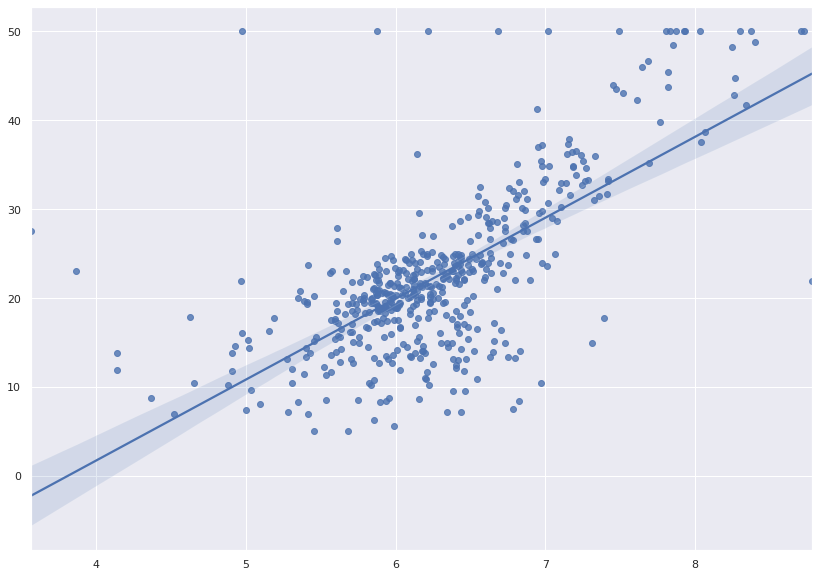

In [26]:
sns.regplot(x=dataset[:,5],y=Y,data=df)

In [27]:
#standardising data
scaler=MinMaxScaler(feature_range=(0,1))
rX=scaler.fit_transform(X)
set_printoptions(precision=3)
print(rX[0:1,:])

[[0.    0.18  0.068 0.    0.315 0.578 0.642 0.269 0.    0.208 0.287 1.
  0.09 ]]


In [28]:
#splitting into training and testing data
validation_size=0.25
seed=0
X_train, X_test, Y_train, Y_test=train_test_split(rX,Y,test_size=validation_size,random_state=seed)

In [29]:
num_fold=4
#num_fold 4 seems to give best R2 and better comparison
seed=1
scoring='r2'

In [30]:
models=[]
models.append(('LR',LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))
results=[]
names=[]
for name,model in models:
  kfold=KFold(n_splits=num_fold,random_state=seed,shuffle=True)
  cvResults=cross_val_score(model,X_train,Y_train,cv=kfold,scoring=scoring)
  results.append(cvResults)
  names.append(name)
  print("%s: %f (%f)"%(name,cvResults.mean(),cvResults.std()))

LR: 0.735013 (0.061176)
LASSO: 0.276900 (0.030387)
EN: 0.181602 (0.019513)
KNN: 0.718499 (0.047178)
CART: 0.796435 (0.061578)
SVR: 0.607005 (0.059220)


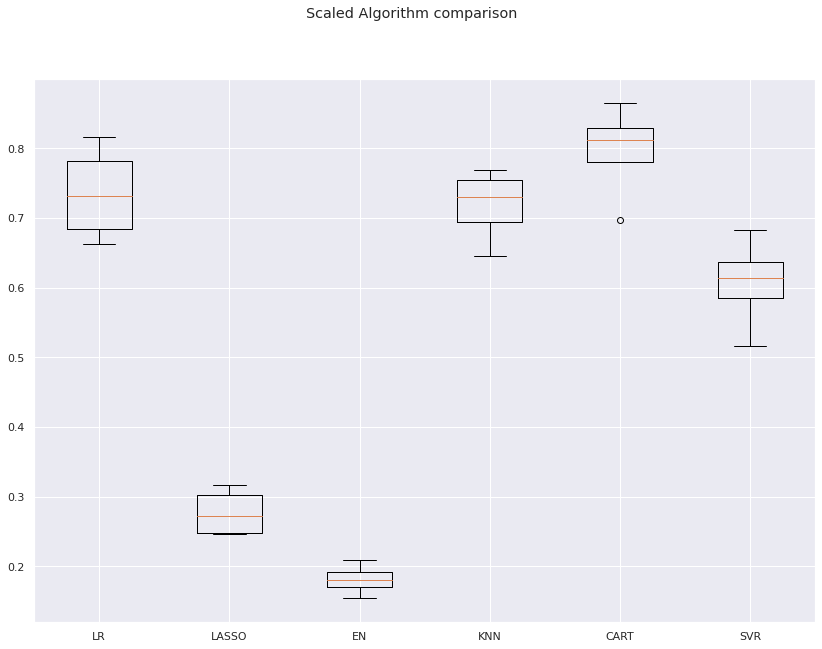

In [31]:
#compare models
fig=plt.figure()
fig.suptitle("Scaled Algorithm comparison")
ax=fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [45]:
#preparing the model
model=DecisionTreeRegressor(max_depth=25)
model.fit(X_train,Y_train)
predictions=model.predict(X_test)
print(r2_score(Y_test,predictions))

0.6833759393909838


In [46]:
scaler=StandardScaler().fit(X_train)
rescaledX=scaler.transform(X_train)
model=GradientBoostingRegressor(random_state=seed,n_estimators=100)
model.fit(rescaledX,Y_train)
rescaledTestX=scaler.transform(X_test)
predictors=model.predict(rescaledTestX)
print(r2_score(Y_test,predictors))

0.8177861460933191
